- variables:Peter,Juan,Jim,Jane,Mary,Bruce,Anita,Ciaray

- Domain:

- Name 	Abilities

- Peter Python and AI

- Juan 	Web and AI

- Jim 	AI and Systems

- Jane 	Python and Database

- Mary 	Web and Systems

- Bruce Systems and Python

- Anita Web and AI

Constraint

- python:2

- (but Ciara knows python, so she needs hire 1 more person whos python)
 
- AI:2

- Web:1

- Database:1

- system:1

- hire 3 people

In [51]:
##pip install ortools
## https://www.youtube.com/watch?v=_e64FiDWvqs
## https://www.youtube.com/watch?v=4cCS8rrYT14&list=TLPQMDkwMTIwMjSKwtLQ5WHKDw&index=2
## https://developers.google.com/optimization/reference/python/sat/python/cp_model
## https://ics.uci.edu/~dechter/courses/ics-275/fall-2020/slides/OR-Tools_CP-SAT_Solver_Tutorial.pdf


## Scenario 1

In [52]:
from ortools.sat.python import cp_model
from itertools import combinations

# define the variables and domains
candidates = {
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"],
    "Ciara": ["Python"]
}

# skills requires
listSkills = ["Python", "AI", "Web", "Database", "Systems"]

In [53]:
# Create a HireTeam CP model
HireTeam = cp_model.CpModel()

# peopleSelected: 0 if not selected, 1 if selected
peopleSelected = {person: HireTeam.NewBoolVar(person) for person in candidates}

In [54]:
# 1st constraint, Ciara has Python skill
HireTeam.Add(peopleSelected["Ciara"] == 1)

# 2nd constrain, hire 3 people
# and sumup the number is people who have been selected
HireTeam.Add(sum(peopleSelected.values()) == 3)

# Constraint need check all skills that require
for skill in listSkills:
    HireTeam.Add(sum(peopleSelected[person] for person, skills in candidates.items() if skill in skills) >= 1)

# Backtracking function with constraint checking
def backtrack(assignment, start_index=0):
    if len(assignment) == 3 and satisfies_constraints(assignment):
        return [sorted(assignment)]  # Sort the result
    else:
        result = []
        for person in peopleSelected.keys():
            if person not in assignment:
                result.extend(backtrack(assignment + [person], start_index))
        return result

# Constraint satisfaction function
def satisfies_constraints(solutions):
    combined_skills = [skill for person in solutions for skill in candidates.get(person, [])]
    return all(skill in combined_skills for skill in listSkills) and \
           sum("AI" in candidates[person] for person in solutions) >= 2
    
# Print the solution by backtracking
solution = set(map(tuple, backtrack([])))
for solutions in solution:
    print("Hire Team:")
    for person in solutions:
        print(person)
    print()

Hire Team:
Jane
Jim
Juan

Hire Team:
Anita
Jane
Jim



## Scenario 2

- 2Python
- 3 AI
- 1 Web
- 1 Database
- 1 System

In [55]:
##from constraint import Problem, AllDifferentConstraint

# List for the people and their skills
#people_skills = {
#    "Ciara": ["Python"],
#    "Peter": ["Python", "AI"],
#    "Juan": ["Web", "AI"],
#    "Jim": ["AI", "Systems"],
#    "Jane": ["Python", "Database"],
#    "Mary": ["Web", "Systems"],
#    "Bruce": ["Systems", "Python"],
#    "Anita": ["Web", "AI"]
#}

# List desired skills
#list_skills = ["Python", "AI", "Web", "Database", "Systems"]

# Create a CSP problem
##problem = Problem()

# Add variables to the problem
#for person in people_skills:
#    problem.addVariable(person, [0, 1])

# Constraint: Select exactly 4 people (besides Ciara and Juan)
#problem.addConstraint(lambda *people: sum(people) == 4, list(people_skills.keys()))

# Constraint: Ciara and Juan must be selected
##problem.addConstraint(lambda ciara, juan: ciara == juan == 1, ("Ciara", "Juan"))
##problem.addConstraint(lambda ciara: ciara == 1, ("Ciara",))
##problem.addConstraint(lambda juan: juan == 1, ("Juan",))


# Constraint: Ensure all skills are covered
#def skill_constraint(*args):
#    selected_people = [person for person, selected in zip(people_skills.keys(), args) if selected]
#    selected_skills = set(skill for person in selected_people for skill in people_skills[person])
#    return all(skill in selected_skills for skill in list_skills)

#problem.addConstraint(skill_constraint, list(people_skills.keys()))

# Define the backtrack function
#def backtrack(selected_people):
#    if len(selected_people) == 4:
#        return [tuple(selected_people)]
    
#    solutions = []
#    for person in people_skills.keys():
#        if person not in selected_people:
#            solutions.extend(backtrack(selected_people + [person]))
    
#    return solutions

# Find all solutions
#solutions = problem.getSolutions()

# Print unique combinations generated by backtracking
#unique_combinations = set(map(tuple, backtrack([])))
#for combination in unique_combinations:
#    print("Combination:")
#    for person in combination:
#        print(person)
#    print()
#

In [56]:
from constraint import Problem

# define the variables and domains
candidates = {
    "Ciara": ["Python"],
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"]
}

# skills requires
listSkills = ["Python", "AI", "Web", "Database", "Systems"]

# Constraint satisfaction function
# The people with the skill have to be matched
## and people have AI skills, have to 3 people
def satisfies_constraints(combination):
    peopleSelected = [person for person, selected in combination.items() if selected]
    combined_skills = [skill for person in peopleSelected for skill in candidates.get(person, [])]
    return all(skill in combined_skills for skill in listSkills) and \
           sum("AI" in candidates[person] for person in peopleSelected) >= 3

# Create a CSP problem
HireTeam = Problem()

# Add variables to the HireTeam
for person in candidates:
    HireTeam.addVariable(person, [0, 1])

# 1st Constraint hire 4 people
HireTeam.addConstraint(lambda *people: sum(people) == 4, list(candidates.keys()))

# 2nd Constraint need check all skills that require
solutions = [combination for combination in HireTeam.getSolutions() if satisfies_constraints(combination)]

# 3rd Ciara and juan have been selected
HireTeam.addConstraint(lambda ciara, juan: ciara == juan == 1, ("Ciara", "Juan"))


# Print unique combinations generated by backtracking
for combination in solutions:
    print("Combination:")
    for person, selected in combination.items():
        if selected:
            print(person)
    print()


Combination:
Anita
Jane
Jim
Juan

Combination:
Anita
Jane
Jim
Peter

Combination:
Jane
Jim
Juan
Peter



## Tasks for Data Visualisation

#### Use appropriate visualisations to help communicate the CSP scenario and the corresponding solutions, if any, to the appropriate stakeholders.

TypeError: can only join an iterable

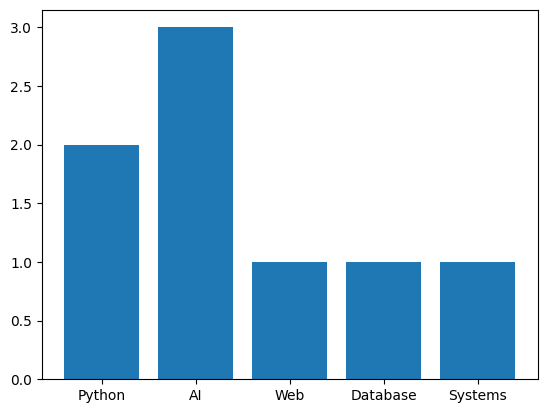

In [77]:
## solution for Scenario 2
## import matplotlib to visualize a bar chart
import matplotlib.pyplot as plt

# Count people who have been Hired for each skill
people_selection_counts = {skill: [person for person in candidates if combination[person] and skill in candidates[person]] for skill in listSkills}


# Display the number of people for each skill in the bar chart
skills = list(people_selection_counts.keys())
selection_counts = [len(people_selection_counts[skill]) for skill in skills]

plt.bar(skills, selection_counts)

# Add Name to the bars
for skill, count in zip(skills, selection_counts):
    people_in_skill = ", ".join(people_selection_counts[skill])
    plt.text(skill, count, f'{count}\n{people_in_skill}', ha='center', va='bottom')

plt.xlabel('Skills')
plt.ylabel('Number of People Are Hired')
plt.title('Number of People  Are Hired for Each Skill')
plt.show()


### Create GUI(s) to allow a user to explore alternate constraint scenarios

In [75]:
## GUI for scenario 2

import tkinter as tk
from constraint import Problem

# Define the variables and domains
candidates = {
    "Ciara": ["Python"],
    "Peter": ["Python", "AI"],
    "Juan": ["Web", "AI"],
    "Jim": ["AI", "Systems"],
    "Jane": ["Python", "Database"],
    "Mary": ["Web", "Systems"],
    "Bruce": ["Systems", "Python"],
    "Anita": ["Web", "AI"]
}

# Skills required
listSkills = ["Python", "AI", "Web", "Database", "Systems"]

# Constraint satisfaction function
def satisfies_constraints(combination):
    people_selected = [person for person, selected in combination.items() if selected]
    combined_skills = [skill for person in people_selected for skill in candidates.get(person, [])]
    return all(skill in combined_skills for skill in listSkills) and \
           sum("AI" in candidates[person] for person in people_selected) >= 3

# Create a CSP problem
HireTeam = Problem()

# Add variables to the HireTeam
for person in candidates:
    HireTeam.addVariable(person, [0, 1])

# 1st Constraint: hire 4 people
HireTeam.addConstraint(lambda *people: sum(people) == 4, list(candidates.keys()))

# 2nd Constraint: need to check all skills that require
solutions = [combination for combination in HireTeam.getSolutions() if satisfies_constraints(combination)]

# 3rd Constraint: Ciara and Juan have been selected
HireTeam.addConstraint(lambda ciara, juan: ciara == juan == 1, ("Ciara", "Juan"))

class GUI:
    def __init__(self, root):
        self.root = root
        self.root.title("Scenario 2 GUI solutions")

        self.current_solution_index = 0

        ## set label for different solution
        self.label = tk.Label(root, text="Current Solution:")
        self.label.pack(pady=10)

        ## set label for different solution
        self.next_button = tk.Button(root, text="Next Solution", command=self.show_next_combination)
        self.next_button.pack(pady=10)

        self.show_combination()

    def show_combination(self):
        if 0 <= self.current_solution_index < len(solutions):
            current_combination = solutions[self.current_solution_index]
            self.label.config(text=f"Current Combination: {', '.join(person for person, selected in current_combination.items() if selected)}")
        else:
            self.label.config(text="No more Solution.")

    def show_next_combination(self):
        self.current_solution_index += 1
        self.show_combination()

if __name__ == "__main__":
    root = tk.Tk()
    root.geometry("500x500")  # Set Window size a bit bigger
    app = GUI(root)
    root.mainloop()
()


()